# Steady flow around a cylinder ($Re=40$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(192, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
s2 = ib.stretching(96, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
x = np.concatenate([-s2[::-1], s1[1:]])

s = ib.stretching(128, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
y = np.concatenate([-s[::-1], s[1:]])

solver = ib.Solver(x, y, iRe=1/40.0, Co=0.5)

## Immersed boundaries

In [4]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

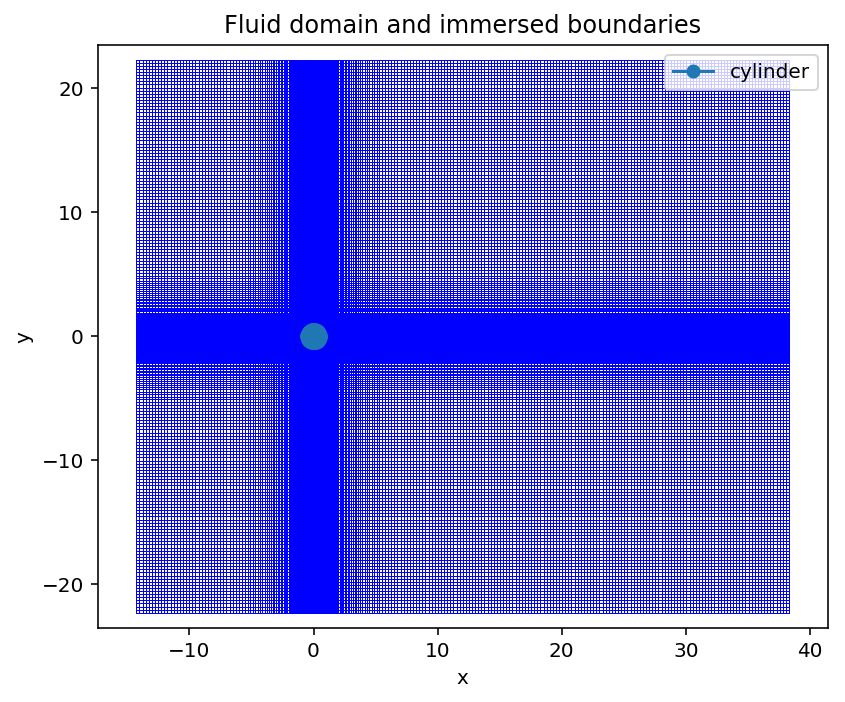

In [5]:
solver.plot_domain(figsize=(6, 5));

## Boundary conditions

In [6]:
uBC, vBC = solver.zero_boundary_conditions()
for k in range(4):
    uBC[k][:] = 1

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Steady simulation

In [7]:
x0 = solver.zero(); x0[:solver.fluid.u.size] = 1.0

In [8]:
%time x, infodict = solver.steady_state(x0, uBC, vBC, sBC, outflowEast=False)

   k   residual_x   residual_f  cylinder_fx  cylinder_fy 
   1  3.98740e-01  1.95671e+00  3.09308e+00 -8.56086e-15 
   2  2.59878e-01  2.95697e-02  1.61336e+00  1.30972e-15 
   3  1.31933e-02  4.38965e-03  1.58140e+00  5.97612e-16 
   4  5.48359e-04  5.08697e-04  1.58075e+00  2.46331e-16 
   5  1.37778e-06  3.17922e-06  1.58075e+00 -1.02349e-16 
   6  1.42695e-11  5.16216e-11  1.58075e+00  5.46438e-17 
CPU times: user 3min 10s, sys: 9.22 s, total: 3min 19s
Wall time: 10.9 s


## Display results

Display velocity field and pressure

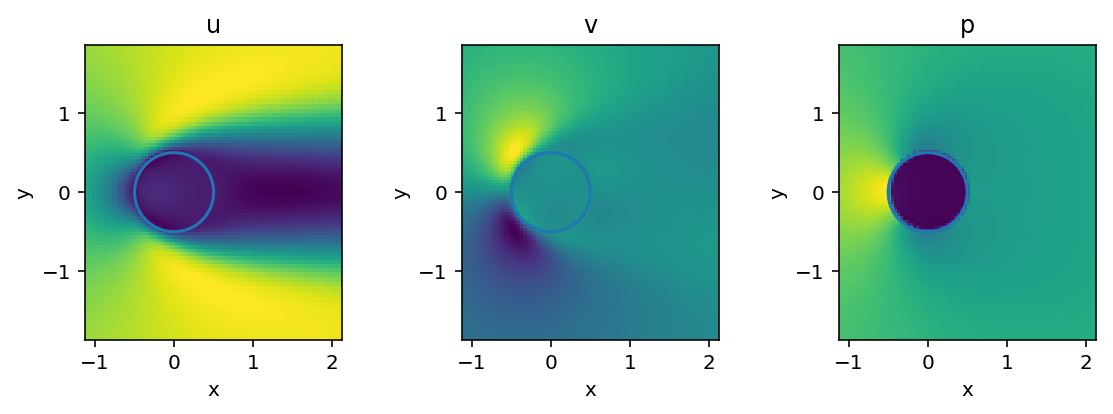

In [9]:
solver.plot_field(x, xlim=(-1, 2), ylim=(-0.5, 0.5))

Show convergence history

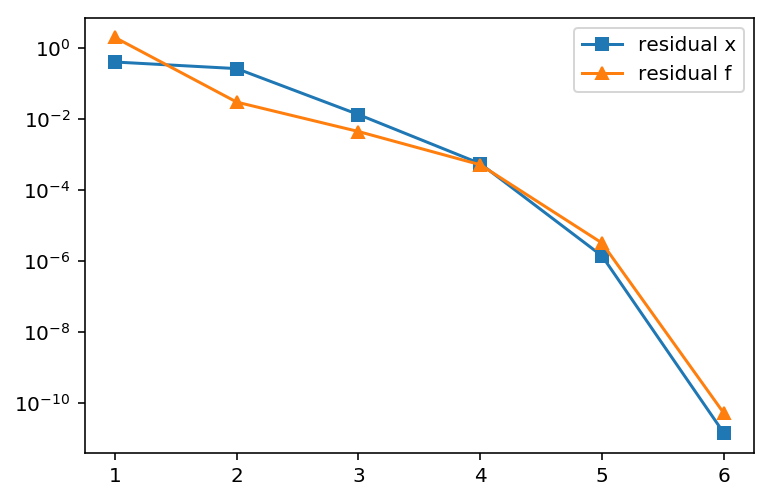

In [10]:
from matplotlib.ticker import MaxNLocator
k = np.arange(1, len(infodict['residual_x'])+1)
plt.semilogy(k, infodict['residual_x'], 's-', label='residual x')
plt.semilogy(k, infodict['residual_f'], '^-', label='residual f')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend();